## Import Libraries

In [ ]:
# Basic libraries
import os
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings("ignore")


### Load Dataset


In [ ]:
# Define file path
BASE_DIR = os.path.dirname(os.getcwd())  # models/
DATA_PATH = os.path.join(BASE_DIR, "data", "CVD_cleaned.csv")

# Load CSV
df = pd.read_csv(DATA_PATH)

# Preview
df.head()


### Data Info

In [3]:
# Dataset shape and info
print("Shape:", df.shape)
print("\nColumns Info:\n")
df.info()


Shape: (308854, 19)

Columns Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(

### Summary Statistics

In [4]:
# Numerical summary
df.describe()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
# Categorical summary
df.describe(include='object')


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


### Missing Values

In [6]:
# Check missing values
df.isnull().sum()


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### Target Distribution

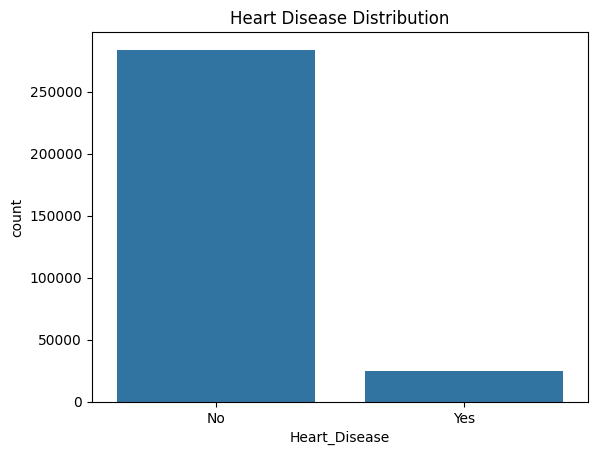

In [7]:
# Heart Disease distribution
sns.countplot(x="Heart_Disease", data=df)
plt.title("Heart Disease Distribution")
plt.show()


### Categorical Features

In [8]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols


['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

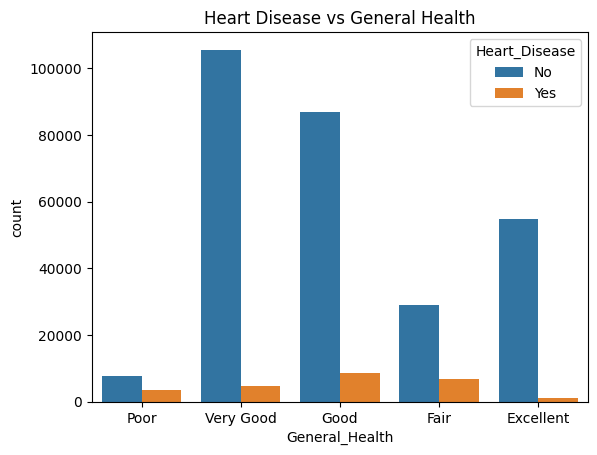

In [9]:
# Example plot for 'General_Health'
sns.countplot(x='General_Health', hue='Heart_Disease', data=df)
plt.title("Heart Disease vs General Health")
plt.show()


### Numerical Features

In [10]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols


['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

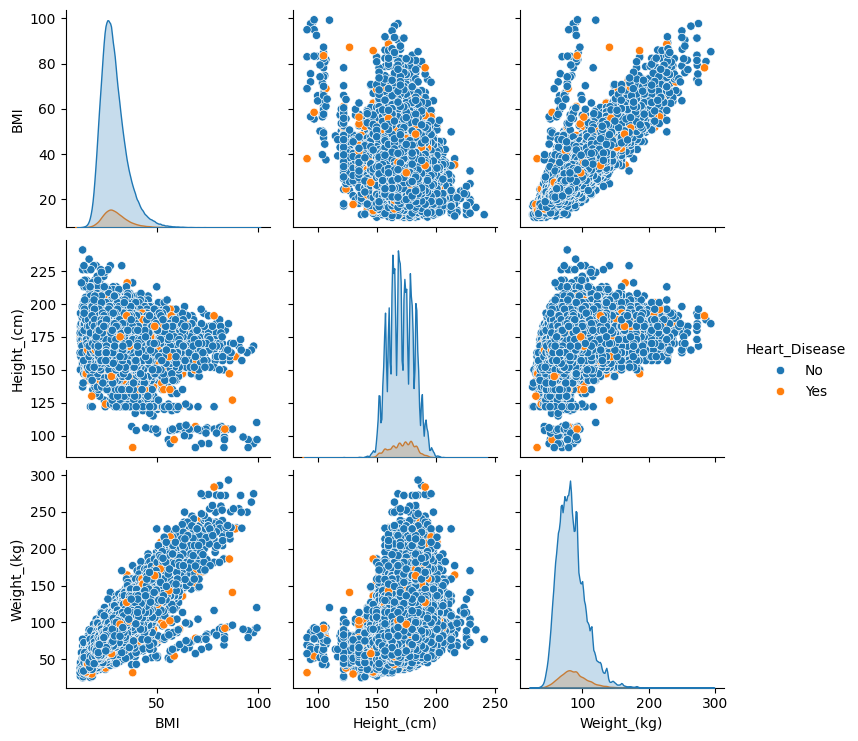

In [11]:
# Pairplot for numerical features vs target
sns.pairplot(df, vars=['BMI','Height_(cm)','Weight_(kg)'], hue='Heart_Disease')
plt.show()


### Correlation Heatmap

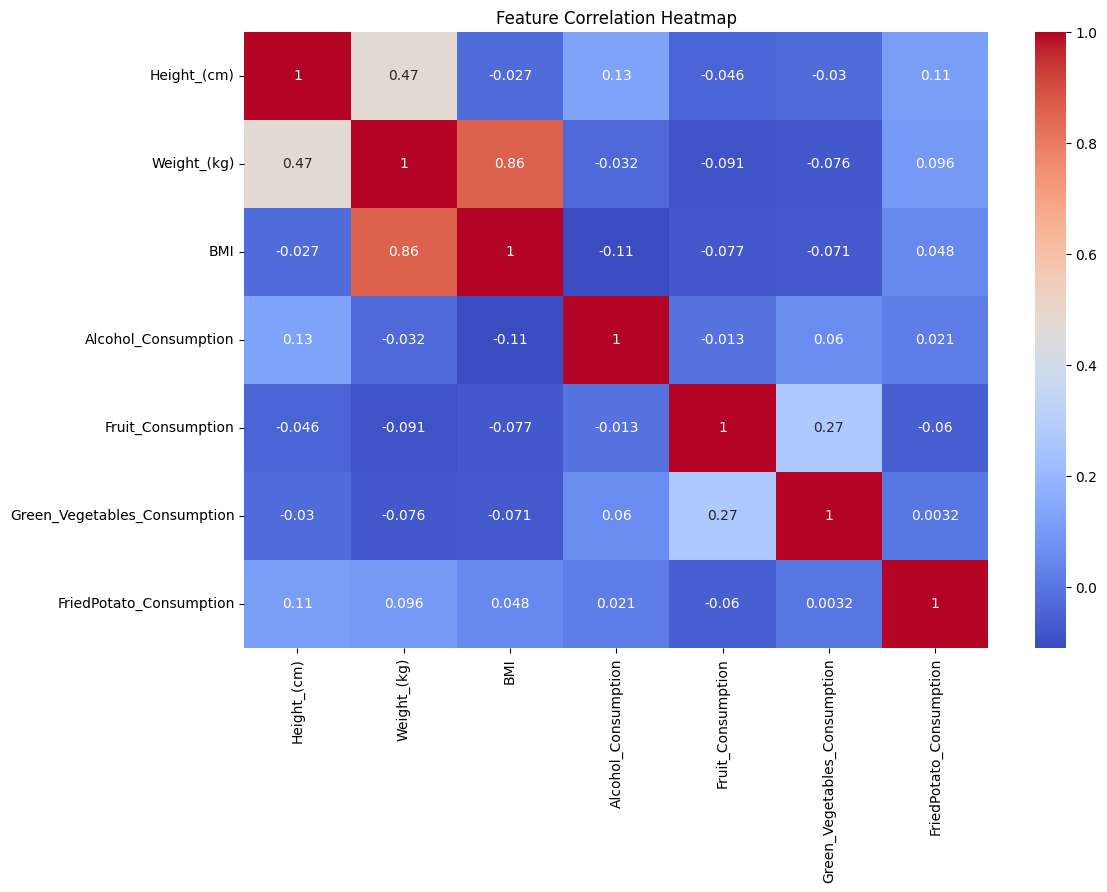

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


### Target vs Continuous Variables

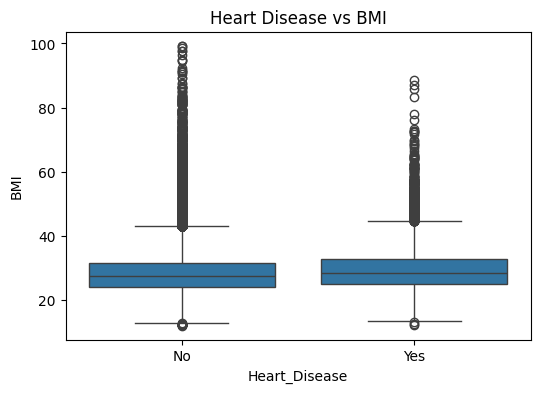

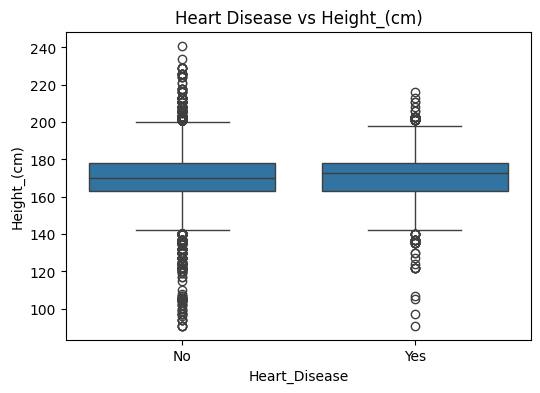

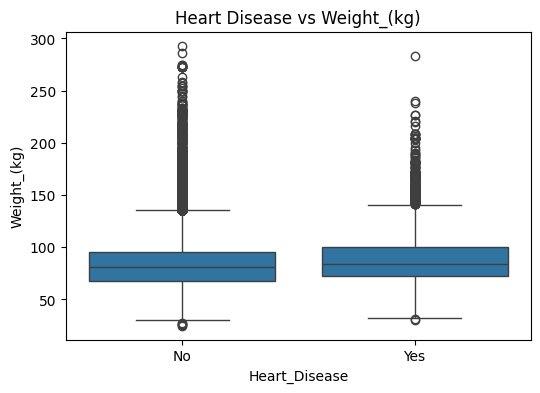

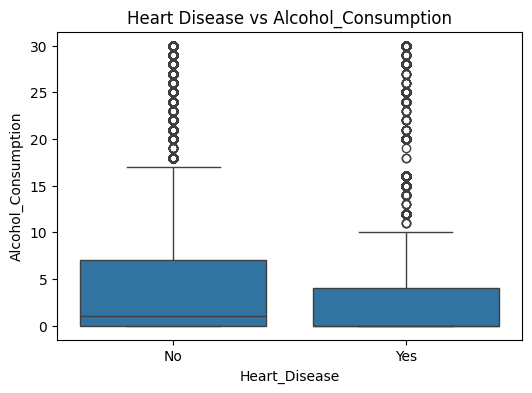

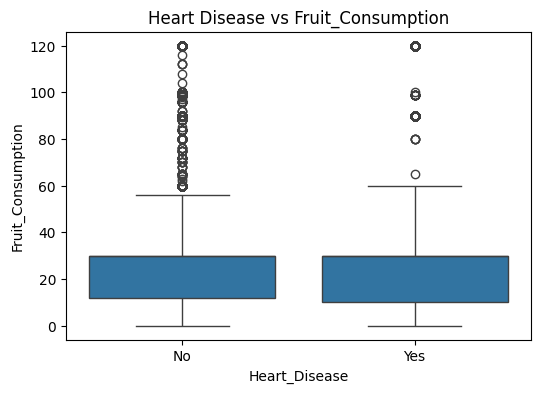

In [15]:
for col in ['BMI','Height_(cm)','Weight_(kg)','Alcohol_Consumption','Fruit_Consumption']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Heart_Disease', y=col, data=df)
    plt.title(f"Heart Disease vs {col}")
    plt.show()
